In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from feature_engine.encoding import (
    OrdinalEncoder,
)
from sklearn.preprocessing import MinMaxScaler
import timeit
import xgboost as xgb


ModuleNotFoundError: No module named 'xgboost'

In [2]:
# load dataset


data = load_data('dataset_SCL.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(68206, 18)


/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
169,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,1,1,2017,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico
5078,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,1,1,2017,Domingo,I,Grupo LATAM,Santiago,Bogota
622,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,1,1,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama
409,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,1,1,2017,Domingo,I,Avianca,Santiago,Bogota
592,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,1,1,2017,Domingo,I,Copa Air,Santiago,Ciudad de Panama


# Creación y selección de datos relevantes

In [3]:
data = create_hour(data)
data = create_syntethic_features(data)

In [4]:
data[data.temporada_alta==1]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,HORA,temporada_alta,dif_min,atraso_15,periodo_dia
169,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,...,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico,0,1,-11.0,0,noche
5078,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,...,Domingo,I,Grupo LATAM,Santiago,Bogota,1,1,-5.0,0,noche
622,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,...,Domingo,I,Copa Air,Santiago,Ciudad de Panama,1,1,6.0,0,noche
409,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,...,Domingo,I,Avianca,Santiago,Bogota,1,1,5.0,0,noche
592,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,...,Domingo,I,Copa Air,Santiago,Ciudad de Panama,1,1,-2.0,0,noche
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66797,2017-12-31 23:30:00,532,SCEL,KJFK,LAN,2017-12-31 23:32:00,532.0,SCEL,KJFK,LAN,...,Domingo,I,Grupo LATAM,Santiago,Nueva York,23,1,2.0,0,noche
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622.0,SCEL,MMMX,LAN,...,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico,23,1,32.0,1,noche
62026,2017-12-31 23:45:00,11,SCEL,MMMX,AMX,2017-12-31 23:42:00,11,SCEL,MMMX,AMX,...,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico,23,1,-3.0,0,noche
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602.0,SCEL,KLAX,LAN,...,Lunes,I,Grupo LATAM,Santiago,Los Angeles,23,1,7.0,0,noche


In [5]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,HORA,temporada_alta,dif_min,atraso_15,periodo_dia
169,2017-01-01 00:15:00,11,SCEL,MMMX,AMX,2017-01-01 00:04:00,11,SCEL,MMMX,AMX,...,Domingo,I,Aeromexico,Santiago,Ciudad de Mexico,0,1,-11.0,0,noche
5078,2017-01-01 01:15:00,572,SCEL,SKBO,LAN,2017-01-01 01:10:00,572,SCEL,SKBO,LAN,...,Domingo,I,Grupo LATAM,Santiago,Bogota,1,1,-5.0,0,noche
622,2017-01-01 01:23:00,495,SCEL,MPTO,CMP,2017-01-01 01:29:00,495,SCEL,MPTO,CMP,...,Domingo,I,Copa Air,Santiago,Ciudad de Panama,1,1,6.0,0,noche
409,2017-01-01 01:33:00,240,SCEL,SKBO,AVA,2017-01-01 01:38:00,240,SCEL,SKBO,AVA,...,Domingo,I,Avianca,Santiago,Bogota,1,1,5.0,0,noche
592,2017-01-01 01:42:00,276,SCEL,MPTO,CMP,2017-01-01 01:40:00,276,SCEL,MPTO,CMP,...,Domingo,I,Copa Air,Santiago,Ciudad de Panama,1,1,-2.0,0,noche


In [6]:
PATH='synthetic_data.csv'
save_syntethic_features(data, path=PATH)

# Drop features
## Variables -O

Las variables -O se refieren a lo que sucedió, indepentiende de lo programado. Se puede suponer que el si hubo un cambio respecto a lo programado, puede haber alguna causa de fondo que cause un retraso.
Veamos primero el retraso promedio

In [7]:
retraso_promedio = data.atraso_15.mean()
print(f'Retraso promedio: {retraso_promedio} min')

Retraso promedio: 0.18493974137172683 min


In [8]:
retraso_promedio = data[data['Des-O']!=data['Des-I']].atraso_15.mean()
print(f'Retraso promedio ante cambio de destino: {retraso_promedio} min')

Retraso promedio ante cambio de destino: 0.2857142857142857 min


In [9]:
retraso = data[data['Vlo-O']!=data['Vlo-I']].atraso_15.mean()
print(f'Retraso promedio ante cambio de nro de vuelo: {retraso} min')

Retraso promedio ante cambio de nro de vuelo: 0.252972972972973 min


In [10]:
retraso = data[data['Emp-O']!=data['Emp-I']].atraso_15.mean()
print(f'Retraso promedio ante cambio de aerolinea: {retraso} min')

Retraso promedio ante cambio de aerolinea: 0.1800310675451283 min


Los cambios en destino y aerolinea reflejan un mayor retraso. Sin embargo, estos datos contienen datos que se conocen luego de que se produjo el retraso, por lo cual no son útiles para predecir.

In [11]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'HORA', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia'],
      dtype='object')

In [12]:
data.drop(columns=['Vlo-O','Ori-O', 'Des-O', 'Emp-O','Fecha-O'],inplace=True)

In [13]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'DIA', 'MES', 'AÑO',
       'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES', 'HORA',
       'temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia'],
      dtype='object')

## Variables redundantes e innecesarias
### Origen

In [14]:
data['Ori-I'].unique()

array(['SCEL'], dtype=object)

In [15]:
data['SIGLAORI'].unique()

array(['Santiago'], dtype=object)

In [16]:
#ambas se refieren al origen y no contienen información relevante
data.drop(columns=['Ori-I','SIGLAORI'],inplace=True)

### Empresa operadora

In [17]:
len(data['Emp-I'].unique())

30

In [18]:
len(data['OPERA'].unique())

23

Pareece que hay alguna diferencia entre las dos categorias. Chequeemos esto

In [19]:
for op in data.OPERA.unique(): 
    tmp = data[data.OPERA==op]
    if len(tmp['Emp-I'].unique())>1:
        print(op)
        print(tmp['Emp-I'].unique())

Grupo LATAM
['LAN' 'TAM' 'LAP' 'LXP' 'LNE' 'DSM' 'LPE']
Latin American Wings
['LAW' 'JMR']


In [20]:
len(data[data['Emp-I'].isin(['LAP','LXP','LNE','DSM','LPE'])])/len(data)*100

0.340146028208662

Dado que las variables son altamente dependientes, y representan lo mismo, se descarta una de ellas.

In [21]:
data.drop(columns=['Emp-I'],inplace=True)

In [22]:
data.columns

Index(['Fecha-I', 'Vlo-I', 'Des-I', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLADES', 'HORA', 'temporada_alta', 'dif_min', 'atraso_15',
       'periodo_dia'],
      dtype='object')

# Destino

In [23]:
data.SIGLADES.nunique()

62

In [24]:
data['Des-I'].nunique()

64

In [25]:
for op in data['SIGLADES'].unique(): 
    tmp = data[data['SIGLADES']==op]
    if len(tmp['Des-I'].unique())>1:
        print(op)
        print(tmp['Des-I'].unique())

Rio de Janeiro
['SBGL' 'SBGR']
Calama
['SCCF' 'SCFA']
Puerto Montt
['SCTE' 'SCBA' 'SCCI' 'SCIE']
Punta Arenas
['SCCI' 'SCTE']
Buenos Aires
['SAEZ' 'SABE' 'SEGU']
Temuco
['SCQP' 'SCTE' 'SCIE']
Miami
['KMIA' 'KJFK']
Cataratas Iguacu
['SBFI' 'SARI']
Quito
['SEQM' 'SEQU']
Melbourne
['YMML' 'YSSY']


Se decide conservar ambas variables, ya que ambas representan el destino de acuerdo a distinto criterio (aeropuerto, ciudad). Es posible que haya retrasasos en un cierto aeropuerto en particular del destino, independientemente de lo que ocurra en otro de la misma ciudad. 

## Fecha y año.
La fecha es redundante respecto a las otras variables temporales y no es extrapolable. Por otro lado, todos los datos son del 2017.

In [26]:
data.drop(columns=['Fecha-I'],inplace=True)

In [27]:
data.drop(columns=['AÑO'],inplace=True)

# Missing values
Veamos que valores faltan, para saber qué hay que imputar si es necesario, y como se relacionan las variables faltantes con el target.

In [28]:
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending=False)

data[data.isna().any(axis=1)]

# Dado que solo hay una fila con datos faltantes, se puede tirar sin perjuicio. En otra situación, puede pensarse en imputar dos.
data=data.dropna()

In [29]:
#chequeemos que no pase nada raro
data[vars_with_na].isnull().mean().sort_values(ascending=False)

Series([], dtype: float64)

# 1:¿Cómo se distribuyen los datos? 


## Target (Retraso)

Empecemos por el retraso

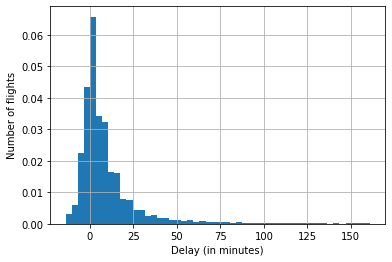

In [30]:
# histogram to evaluate target distribution

data['dif_min'].hist(bins=50, density=True)
plt.ylabel('Number of flights')
plt.xlabel('Delay (in minutes)')
plt.show()

Tal como se espera, la distribución esta centrada en 0 y decae en ambas direcciones. Existe vuelos que no se retrasan, sino que se adelantan.

In [31]:
percent_vuelos_adelantados = round(100*len(data[data.dif_min < 0])/len(data),2) 
print(f'El {percent_vuelos_adelantados}% de los vuelos salen adelantados')

El 26.26% de los vuelos salen adelantados


 La gran mayoría de los retrasos están por debajo de los 50 minutos, pero hay una larga cola que sobrepasa las 2 horas. Sería interesante analizar qué causa estos retrasos más largos.

Si bien en esta notebook se atacará el problema como uno de clasificación, esta larga cola puede causar problemas en un modelo de regresión, por lo que debería aplicarse alguna transformación (p.ej Yeo-Johnson).

Veamos ahora el atraso a 15 minutos

In [32]:
def make_pie_chart(data, var, title=''):

    labels= data[var].value_counts().index
    datas = data[var].value_counts()/len(data)
    fig = plt.figure(figsize=[6, 6])
    ax = fig.add_subplot(111)
    title = title
    ax.set_title(title)
    pie_wedge_collection = ax.pie(datas, labels=labels, labeldistance=1.05,autopct='%.0f%%')

    for pie_wedge in pie_wedge_collection[0]:
            pie_wedge.set_edgecolor('white')

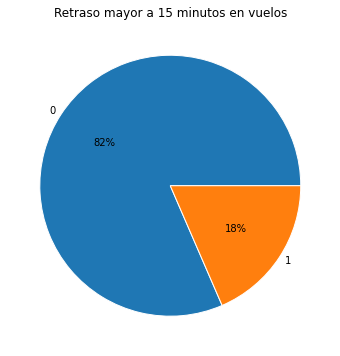

In [33]:
make_pie_chart(data, var= 'atraso_15',title= 'Retraso mayor a 15 minutos en vuelos' )

Como es de esperar, hay un desbalance, no habiendo retraso en la mayoría de los vuelos. Notablemente, hay menos vuelos atrasados que adelantados. El desbalance no es tan grande para aplicar métodos como upsampling (por lo menos en una primera iteración).

Ver: https://machinelearningmastery.com/framework-for-imbalanced-classification-projects/

Es de esperar que haya una dependencia entre los retrasos (varios retrasos consecutivos por clima, por ejemplo). Podemos ver si existe una autocorrelación en el target.

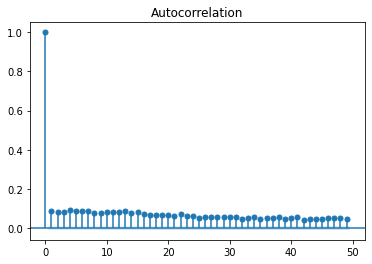

In [34]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plot_acf(x=data['dif_min'])
plt.show()

Existe una autocorrelación, siempre positiva, pero no tan grande. Se puede pensar agregar una nueva feature que contenga la información de si el vuelo anterior fue retrasado, o bien el promedio del target en las anteriores N horas. Si bien esta información probablemente mejoraría el resultado del modelo, muy posiblemente no sea posible tener este dato en una situación real, o sea, sería necesario disponer de la información de los vuelos inmediatamente anteriores, entrenar y predecir. Por eso, no se agregará esta feature en la notebook. 

# Features


## Distribución de variables numéricas

In [35]:
data.columns

Index(['Vlo-I', 'Des-I', 'DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'HORA', 'temporada_alta', 'dif_min', 'atraso_15',
       'periodo_dia'],
      dtype='object')

In [36]:
VARIABLES_DISCRETAS = ['DIA','MES','HORA']

### Dia

<AxesSubplot:>

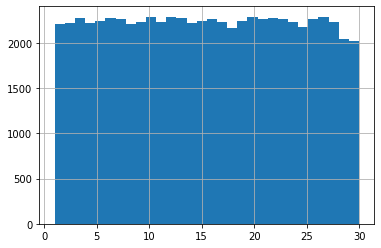

In [37]:
# Descartamos los 31 porque son menos
data[data['DIA']<31]['DIA'].hist(bins=30)

La distribución por día del mes es uniforme, aunque sorprendentemente hay una pequeña caída a fin de mes.

### Hora

<AxesSubplot:>

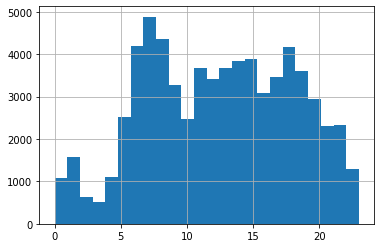

In [38]:
data['HORA'].hist(bins=24)

Es notable una alta actividad a la mañana (entre 6 y 8) y alrededor de las 15.

### Mes

<AxesSubplot:>

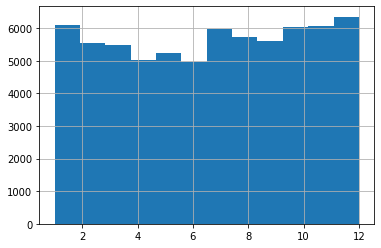

In [39]:
data['MES'].hist(bins=12)

La mayor actividad se da a final y principio de año (vacaciones). Hay una caída desde enero hasta julio, cuando vuelve a retomar.

Text(0, 0.5, 'retraso (min)')

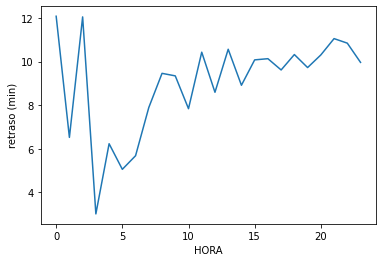

In [40]:
data.groupby('HORA').mean()['dif_min'].plot()
plt.ylabel('retraso (min)')

Text(0, 0.5, 'retraso (min)')

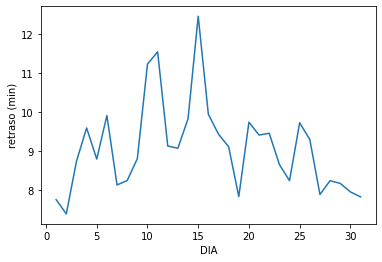

In [41]:
data.groupby('DIA').mean()['dif_min'].plot()
plt.ylabel('retraso (min)')

Text(0, 0.5, 'retraso (min)')

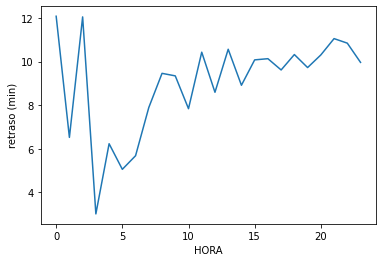

In [42]:
data.groupby('HORA').mean()['dif_min'].plot()
plt.ylabel('retraso (min)')

Se ven mayores retrasos a mediados de mes, pero con grandes fluctuaciones. 

Text(0, 0.5, 'retraso (min)')

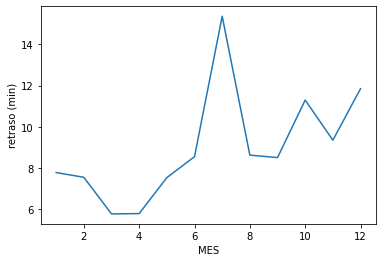

In [43]:
data.groupby('MES').mean()['dif_min'].plot()
plt.ylabel('retraso (min)')

Hubo un aumento fueret de los retrasos durante el mes de julio, cuyas causas valdría la pena estudiar por separado en otro momento.

## Variables categóricas: cardinalidad

In [44]:
VARIABLES_CATEGORICAS = ['Vlo-I', 'Des-I', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'temporada_alta','periodo_dia']

In [45]:
data.columns

Index(['Vlo-I', 'Des-I', 'DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'HORA', 'temporada_alta', 'dif_min', 'atraso_15',
       'periodo_dia'],
      dtype='object')

In [46]:
len(data.columns)

13

In [47]:
len(VARIABLES_CATEGORICAS)

8

<AxesSubplot:>

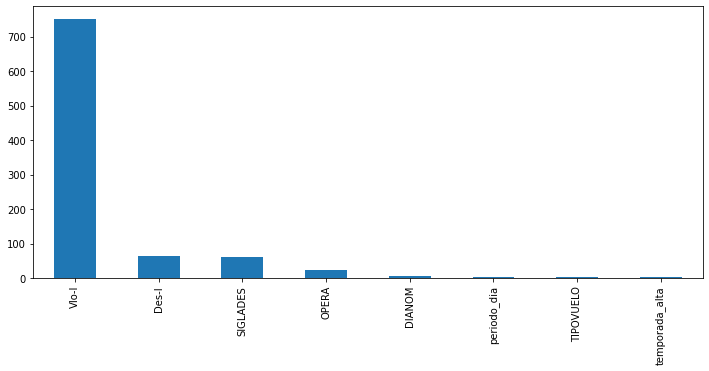

In [48]:
# we count unique categories with pandas unique() 
# and then plot them in descending order
data[VARIABLES_CATEGORICAS].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

El número de vuelo tiene una cardinalidad alta, como es de esperar. Usar un OneHotEncoder puede ser muy pesado. Esta variable puede llegar a no ser importante, dado que es un ID del vuelo y no contiene información en sí.


In [49]:
CAT_REDUCED=['Des-I', 'DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES', 'temporada_alta','periodo_dia']

<AxesSubplot:>

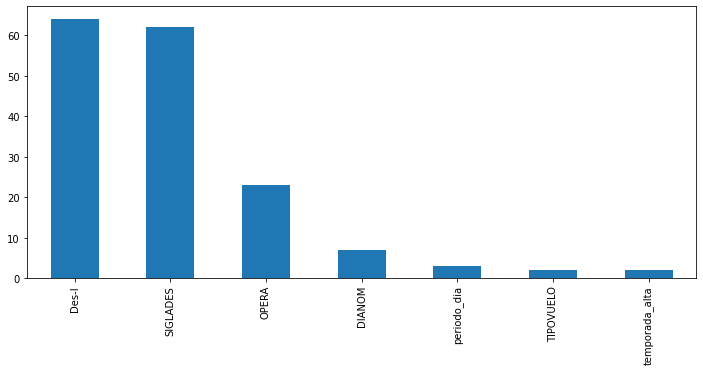

In [50]:
data[CAT_REDUCED].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

In [51]:
VARIABLES_CATEGORICAS

['Vlo-I',
 'Des-I',
 'DIANOM',
 'TIPOVUELO',
 'OPERA',
 'SIGLADES',
 'temporada_alta',
 'periodo_dia']

## Variables categóricas: distribución

## Temporada alta

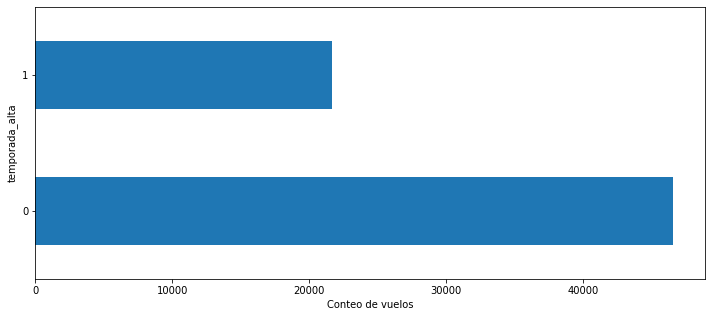

In [52]:
plot_distribucion(data,'temporada_alta')

In [53]:
dias = (16+31+3+16+19)/365
print(f'Días que son temporada alta: {dias}')

Días que son temporada alta: 0.2328767123287671


In [54]:
frac = data.temporada_alta.sum()/len(data)
print(f'Vuelos en temporada alta: {frac}')

Vuelos en temporada alta: 0.3172741401049761


Hay más vuelos en temporada alta, como es esperable, pero no es una cantidad tan importante.

## Aerolinea 

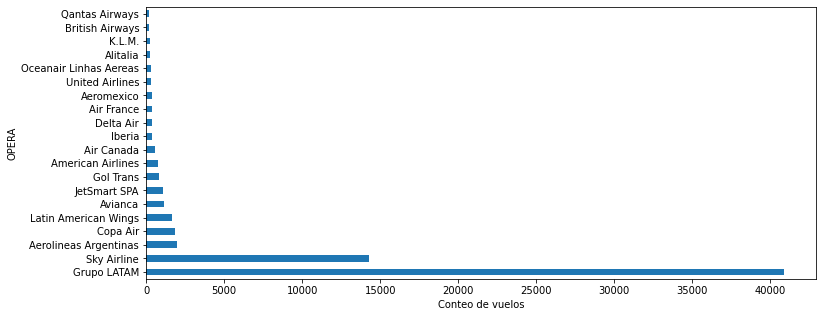

In [55]:
plot_distribucion(data,'OPERA')

La gran mayoria de los vuelos son del grupo LATAM, seguido por Sky Airline, con una participación mucho menor de otras aerolíneas.

El retraso depende de la aerolínea, lo cual muestra que puede ser un buen indicador. Dos aerolíneas tuvieron retrasos en más de la mitad de los vuelos.

## Destino

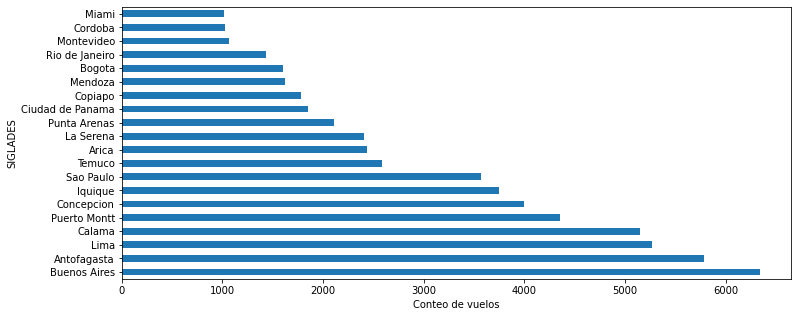

In [56]:
plot_distribucion(data,'SIGLADES')

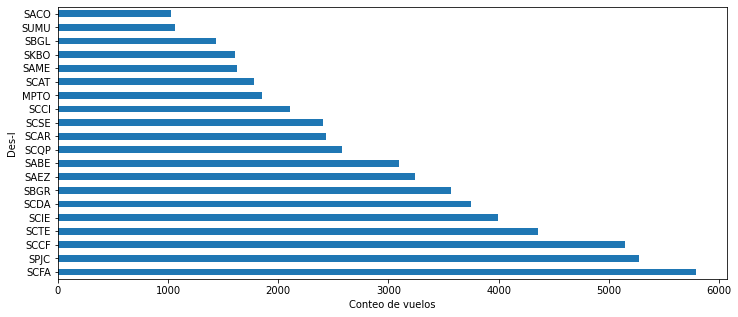

In [57]:
plot_distribucion(data,'Des-I')

Buenos Aires destaca por gran cantidad de vuelos y una cantidad alta de retrasos. Hay lugares con pocos vuelos (Quito) pero en que todos sus vuelos se retrasaron. 

## Día de la semana

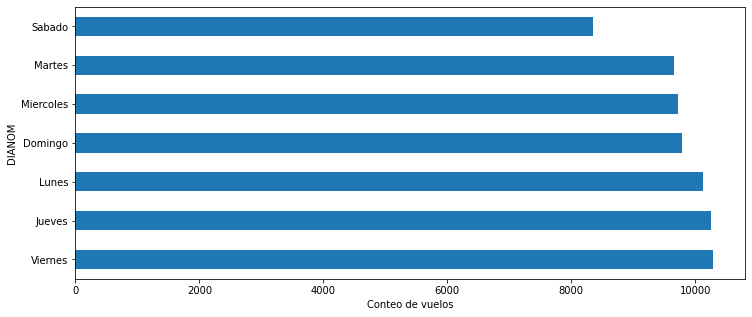

In [58]:
plot_distribucion(data,'DIANOM')

Inesperadamente, hay menos vuelos los sábados. Los viernes, que son el día de mayor actividad, tienen la mayor cantidad de retraso, similar a jueves y lunes

## Código de vuelo

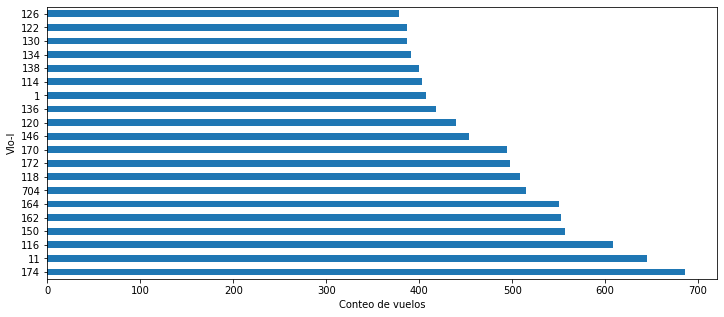

In [59]:
plot_distribucion(data,'Vlo-I')

## Tipo de vuelo

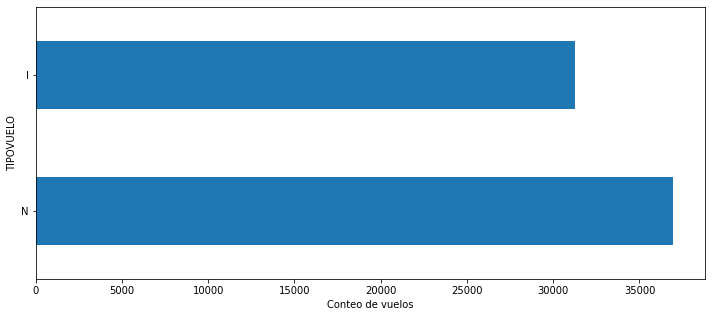

In [60]:
plot_distribucion(data,'TIPOVUELO')

Hay una leve cantidad de vuelos nacionales sobre internacionales

## Periodo del día

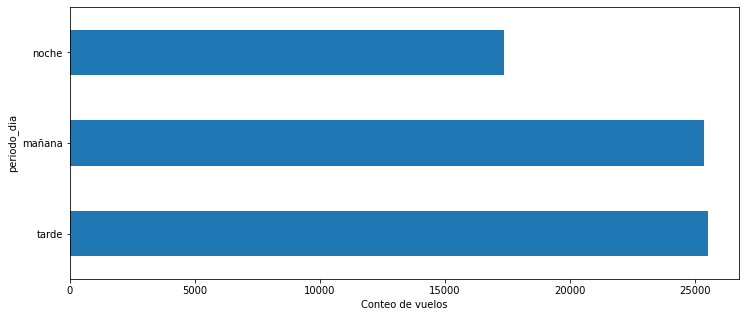

In [61]:
plot_distribucion(data,'periodo_dia')

In [62]:
data[data.periodo_dia=='mañana']

,Vlo-I,Des-I,DIA,MES,DIANOM,TIPOVUELO,OPERA,SIGLADES,HORA,temporada_alta,dif_min,atraso_15,periodo_dia
5883,2636,SPJC,1,1,Domingo,I,Grupo LATAM,Lima,5,1,-4.0,0,mañana
2462,802,SPJC,1,1,Domingo,I,Sky Airline,Lima,5,1,5.0,0,mañana
477,112,MPTO,1,1,Domingo,I,Copa Air,Ciudad de Panama,5,1,-3.0,0,mañana
1753,120,SCCF,1,1,Domingo,N,Sky Airline,Calama,6,1,-3.0,0,mañana
684,7661,SBGR,1,1,Domingo,I,Gol Trans,Sao Paulo,6,1,13.0,0,mañana
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65469,251,SCJO,31,12,Domingo,N,Grupo LATAM,Osorno,11,1,1.0,0,mañana
66448,434,SAME,31,12,Domingo,I,Grupo LATAM,Mendoza,11,1,1.0,0,mañana
65381,235,SCQP,31,12,Domingo,N,Grupo LATAM,Temuco,11,1,21.0,1,mañana
64549,91,SCCI,31,12,Domingo,N,Grupo LATAM,Punta Arenas,11,1,-3.0,0,mañana


# Pregunta 3: 
¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?

Hay más retrasos en temporada alta, como era de esperar.

## Variables numéricas

Text(0, 0.5, 'retraso (min)')

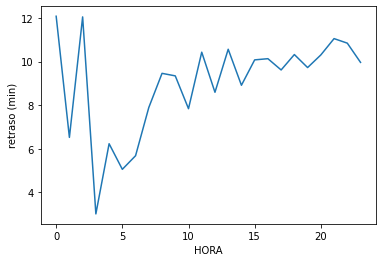

In [63]:
data.groupby('HORA').mean()['dif_min'].plot()
plt.ylabel('retraso (min)')

Las primeras horas de la mañana, con menos acticidad, fluctúan mucho. El retraso crece con la hora del día después de eso.

Text(0, 0.5, 'retraso (min)')

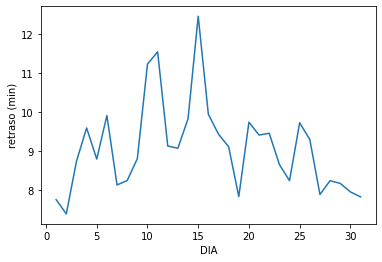

In [64]:
data.groupby('DIA').mean()['dif_min'].plot()
plt.ylabel('retraso (min)')

Se ven mayores retrasos a mediados de mes respecto de los extremos, pero con grandes fluctuaciones. 

Se ven mayores retrasos a mediados de mes, pero con grandes fluctuaciones. 

Text(0, 0.5, 'retraso (min)')

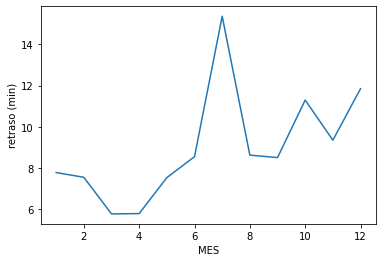

In [65]:
data.groupby('MES').mean()['dif_min'].plot()
plt.ylabel('retraso (min)')

Hubo un aumento fueret de los retrasos durante el mes de julio, cuyas causas valdría la pena estudiar por separado en otro momento.

## Variables categóricas: distribución

## Temporada alta

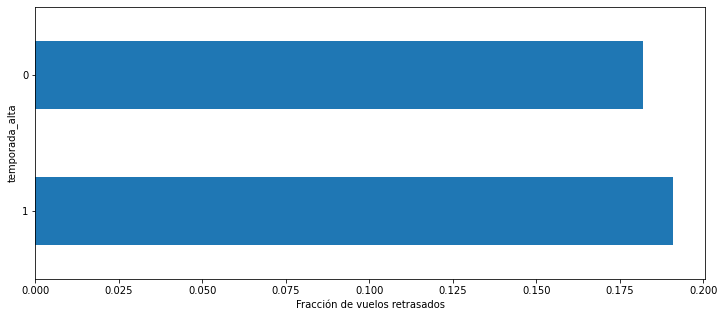

In [66]:
plot_retraso_promedio(data,'temporada_alta')

La fracción de vuelos retrasados es algo mayor en temporada alta, pero no tan significativa.

## Aerolinea 

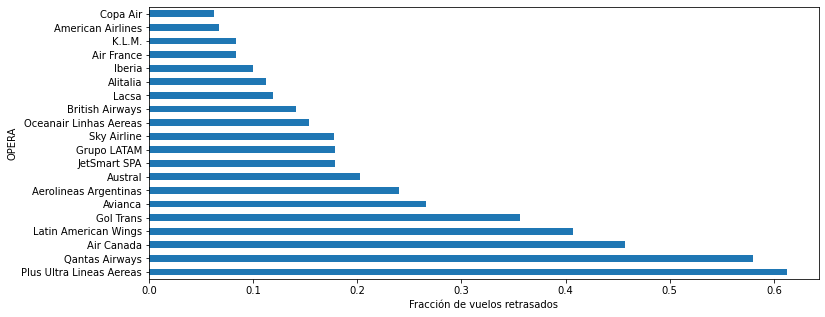

In [68]:
plot_retraso_promedio(data,'OPERA')





## Destino

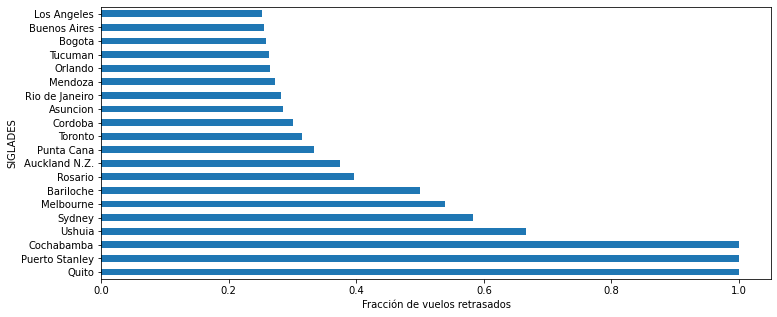

In [69]:
plot_retraso_promedio(data,'SIGLADES')



## Día de la semana

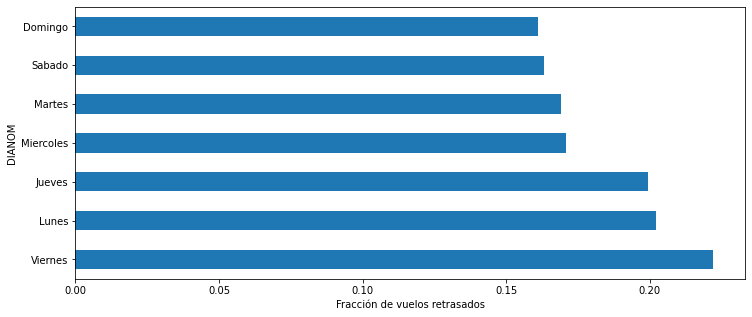

In [70]:
plot_retraso_promedio(data,'DIANOM')



In [71]:
## Código de vuelo

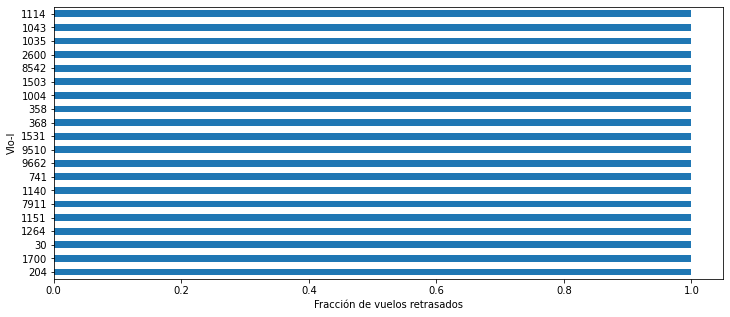

In [72]:
plot_retraso_promedio(data,'Vlo-I')

## Tipo de vuelo

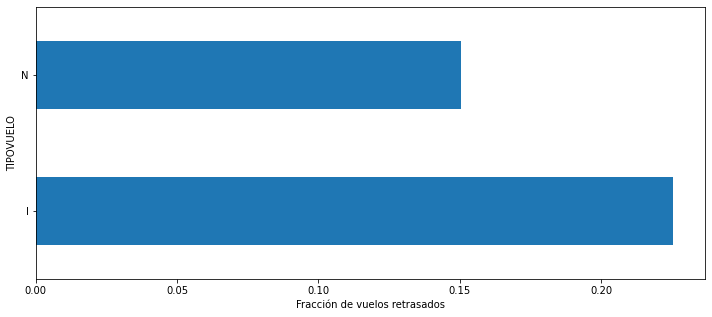

In [73]:
plot_retraso_promedio(data,'TIPOVUELO')



## Periodo del día

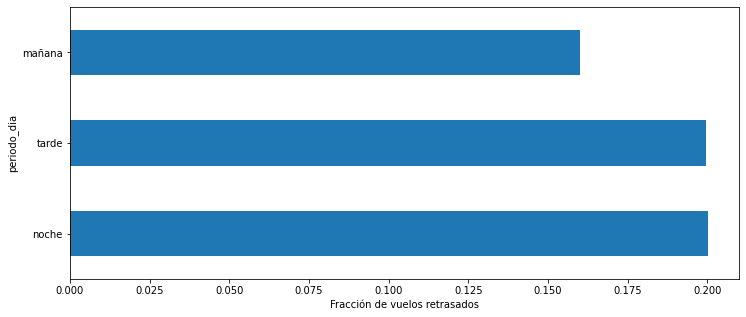

In [74]:
plot_retraso_promedio(data,'periodo_dia')



Es esperable que el mes del año sea un factor indicativo, dado que entran en juego factores climáticos (tormentas). La hora del día también indica que los vuelos se retrasan más al final del día, quizás por efecto de arrastre.

El tipo de vuelo y la aerolínea también muestran ser variables importantes.

# Posibles mejoras

- descartar codigo de vuelo
- tener en cuenta desbalance (ej upsampling, usar metodos de librerias como imblearn)
- usar lstm para tener en cuenta factor de orden temporal
- tomar como problema de regresion

#para hacer despues
agregar LOS CONTEOS SOLOS de las categoricas, sin el 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['atraso_15', 'dif_min'], axis=1), # predictive variables
    data['atraso_15'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=0, # we are setting the seed here
)


In [98]:
CATEGORICAL_VARS = ['Vlo-I', 'Des-I','DIANOM', 'TIPOVUELO', 'OPERA',
       'SIGLADES','periodo_dia']

data[CATEGORICAL_VARS]=data[CATEGORICAL_VARS].astype('object')

In [99]:
data[CATEGORICAL_VARS]

,Vlo-I,Des-I,DIANOM,TIPOVUELO,OPERA,SIGLADES,periodo_dia
169,11,MMMX,Domingo,I,Aeromexico,Ciudad de Mexico,noche
5078,572,SKBO,Domingo,I,Grupo LATAM,Bogota,noche
622,495,MPTO,Domingo,I,Copa Air,Ciudad de Panama,noche
409,240,SKBO,Domingo,I,Avianca,Bogota,noche
592,276,MPTO,Domingo,I,Copa Air,Ciudad de Panama,noche
...,...,...,...,...,...,...,...
66797,532,KJFK,Domingo,I,Grupo LATAM,Nueva York,noche
66947,622,MMMX,Lunes,I,Grupo LATAM,Ciudad de Mexico,noche
62026,11,MMMX,Domingo,I,Aeromexico,Ciudad de Mexico,noche
66918,602,KLAX,Lunes,I,Grupo LATAM,Los Angeles,noche


In [100]:
pipeline = Pipeline(
    
    [ ('categorical_encoder', OrdinalEncoder(
        encoding_method='ordered', variables=CATEGORICAL_VARS)),
])

In [101]:
# train the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('categorical_encoder',
                 OrdinalEncoder(variables=['Vlo-I', 'Des-I', 'DIANOM',
                                           'TIPOVUELO', 'OPERA', 'SIGLADES',
                                           'periodo_dia']))])

In [102]:
## Hpyerparameter tuning for XGBoost algorithm
# from xgboost import XGBClassifier
start = timeit.default_timer()
xgb_model = XGBClassifier()
param_dist = {"max_depth": [2,5,7,10],
           "min_child_weight" : [2,6,10,],
           "n_estimators": [100, 500, 1000],
           "learning_rate" : [0.01,0.05,0.08, 0.1, 0.5, 0.8]}
grid_search = GridSearchCV(xgb_model, param_grid=param_dist, cv = 3, 
                                verbose=10, n_jobs=-1)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

stop = timeit.default_timer()
print('Time: ', stop - start)

NameError: name 'timeit' is not defined